## Title: House Price Prediction

In [1]:
# Edit all the Mardown cells below with the appropriate information 
# Run all cells, containing your code 
# Save this Jupyter with the outputs of your executed cells
# PS: Save again the notebook with this outcome.
# PSPS: Don't forget to include the dataset in your submission

**Student:**
* Taichun Chao
* 
**Course:** CISB 60 – ML and DL (Fall, 2024)

### Problem Statement
* This project  is about USA house price predictions.
    
    
    
* **Keywords:** House price prediction, real estate ,..., 
	

#### Data source and data information

The data file "USA_Housing.csv" was provided by the teacher. It is for training use.\
The data have seven columns. The column name and the data type as follows
* Avg.Area Income: floating 64
* Avg. Area House Age: floating 64
* Avg. Area Number of Rooms: floating 64
* Avg. Area Number of Bedrooms:
* Area Population: floating 64
* Price: floating 64
* Address: object; string

### Required packages

* Add instructions to install the required packages


#### Import library

In [2]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [3]:
#import warning
import warnings
warnings.filterwarnings('ignore')

#### Data Process

##### Read the csv file and set UShousing dataframe
list the first five rows with column names 

In [4]:
#read the data
USHousing = pd.read_csv("data/USA_Housing.csv")
USHousing = USHousing.round(decimals =1)
USHousing.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.5,5.7,7.0,4.1,23086.8,1059033.6,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.6,6.0,6.7,3.1,40173.1,1505890.9,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.1,5.9,8.5,5.1,36882.2,1058988.0,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.2,7.2,5.6,3.3,34310.2,1260616.8,USS Barnett\nFPO AP 44820
4,59982.2,5.0,7.8,4.2,26354.1,630943.5,USNS Raymond\nFPO AE 09386


In [5]:
# Check missing values (NA) in the dataset
USHousing.isna().sum()

# or (dataset_orig == 0).sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

 #### Use infor() to check datatype and the number of data

In [6]:
USHousing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


#### Drop address column
The price of a house depends on many facts. Here, I remove the address fact to make the price prediction simpler.\
Use USHousing.describe() to check the minimum, maximum, standard deviation, and mean

In [7]:
USHousing = USHousing.drop('Address', axis=1)

In [8]:
USHousing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108960,5.977000,6.988120,3.980480,36163.516440,1.232073e+06
std,10657.991502,0.992032,1.006347,1.235255,9925.650505,3.531176e+05
min,17796.600000,2.600000,3.200000,2.000000,172.600000,1.593870e+04
25%,61480.550000,5.300000,6.300000,3.100000,29403.950000,9.975771e+05
50%,68804.300000,6.000000,7.000000,4.000000,36199.400000,1.232669e+06
75%,75783.300000,6.700000,7.700000,4.500000,42861.325000,1.471210e+06
max,107701.700000,9.500000,10.800000,6.500000,69621.700000,2.469066e+06


### Price distribution in histogram

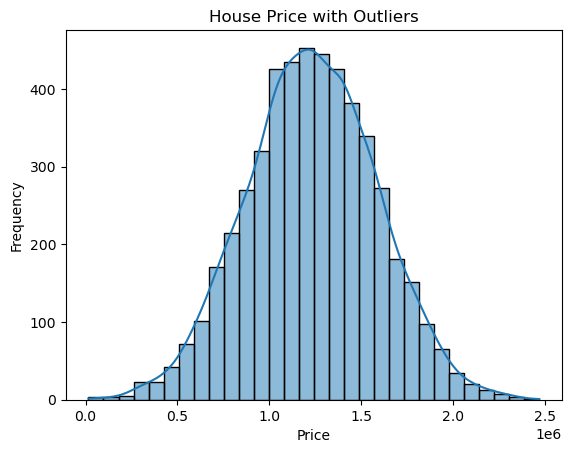

In [9]:
# Plotting a basic histogram

sns.histplot(USHousing.Price, bins=30, kde= True)
# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('House Price with Outliers')
 
# Display the plot
plt.show()

### Remove the outlier of price
From the House price histplot, it looks like a normal distribution, but the slop on right side is sharper \
It means the price increases fast, or there are outliers in high price part. 

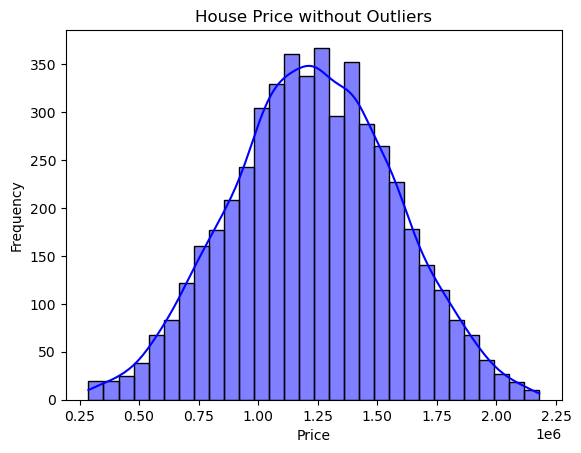

In [10]:
#Find the outlier of the price
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = USHousing['Price'].quantile(0.25)
Q3 = USHousing['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
USHousing_no_outliers = USHousing[(USHousing['Price'] >= lower_bound) & (USHousing['Price'] <= upper_bound)]

# histplot to display the result of remove outliers of "Price"
sns.histplot(USHousing_no_outliers.Price, bins=30, color='blue', edgecolor='black', kde= True)

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('House Price without Outliers')
 
# Display the plot
plt.show()

####  Change the working data to dataset removed price outlier 
Compare the plot, the target data remove outlier is closer normal distribution

In [11]:
USHousing = USHousing_no_outliers

# Check data shape
USHousing.shape

(4965, 6)

#### Display dataset

array([[<Axes: title={'center': 'Avg. Area Income'}>,
        <Axes: title={'center': 'Avg. Area House Age'}>],
       [<Axes: title={'center': 'Avg. Area Number of Rooms'}>,
        <Axes: title={'center': 'Avg. Area Number of Bedrooms'}>],
       [<Axes: title={'center': 'Area Population'}>,
        <Axes: title={'center': 'Price'}>]], dtype=object)

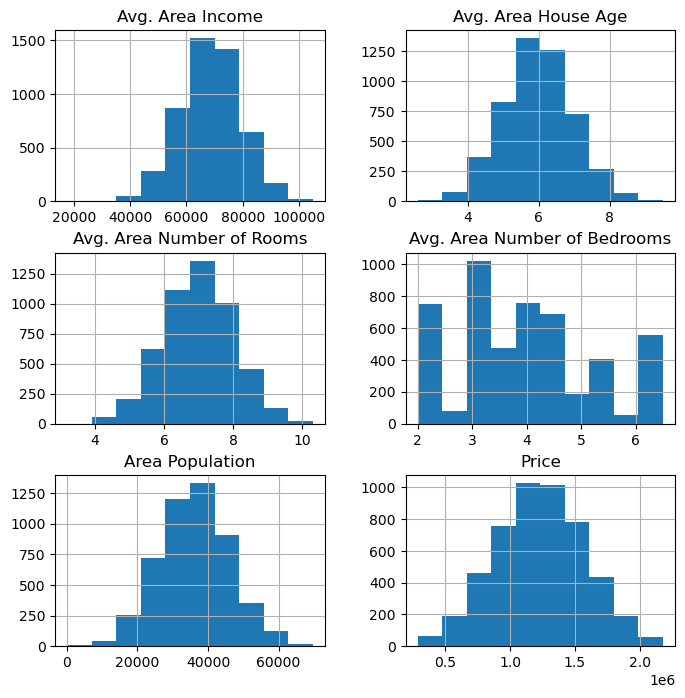

In [12]:
USHousing.hist( figsize = (8,8))

 From the Avg. Area Number Bedrooms plot, we can find:
- The number of bedroom is not normal distribution
- The most popular room number is 3 bedroom
- The number in five or six bedrooms is not so common, but some houses have over six bedroom is more expensive.

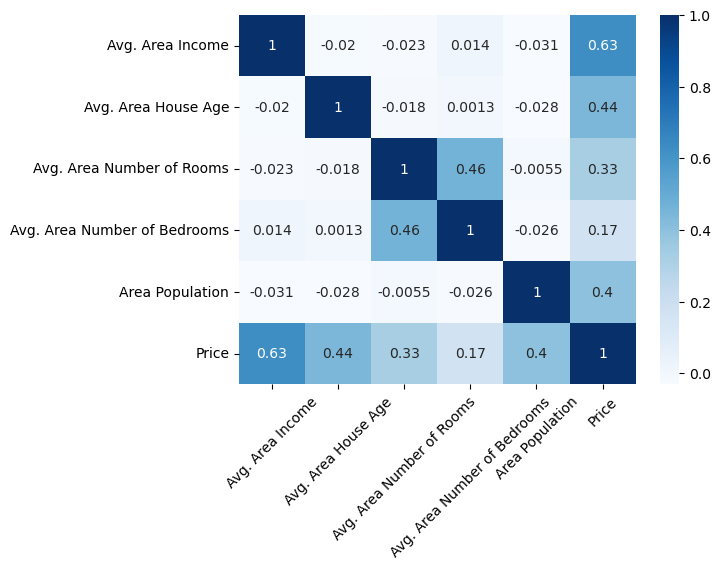

In [13]:
# Use the heatmap to present the relationship between the price and the other conditions of the shopping house.
sns.heatmap(USHousing.corr(numeric_only=True),cmap='Blues',annot=True)
# Rotate the x-axis labels
plt.xticks(rotation=45)  # Adjust the rotation angle as needed
plt.yticks(rotation=0)   # Optional: Keep the y-axis labels horizontal
plt.show()


From the heatmap above
- Avg. Area Income has more positive of the house price
- The second positive fact is Aveg. Area House Age, it may be the Age house has a big log or the area is better
- The Number of rooms and bedrooms has less relationship

### Methodology

1. Explan your ML and DL metodology

   - The dataset of the USA House belongs to linear Regression model
   - Using RandomForest with GridSearchCV in ML to find importance features, R2, and MAE
   - Using the KNN to find the best K. then using the best K to to get MAE and R2.
   - Deep learning: using ANN with Dense
   - 

3. Introduce the topics you used in your project
 * Model 1

    * RandomForest with GridSearchCV
      - Random forest is a commonly-used machine learning algorithm, trademarked by Leo Breiman and Adele Cutler, that combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.
      - GridSearchCV is a technique for finding the optimal parameter values from a given set of parameters in a grid. It's essentially a cross-validation technique
      - 
    * KNN -K-Nearest Neighbors (KNN) is a machine learning algorithm that uses proximity to classify or predict data. KNN finds the k-nearest neighbors to a given query point and predicts the query point's class or value based on its neighbors. 
 
 * Model 2
    * Deep Learning- Artificial neural networks (ANN) which is mimic human brain to process information. ANN is made of layers of interconnected nodes. or"nurons"
 

### RandomForst with GridSarchCV- 12.1.2024

In [14]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Setup X as features and y as the target
X = USHousing.drop('Price', axis=1)
y = USHousing["Price"]

# Standardize the X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)

In [15]:
# Define the Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42)

In [16]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'max_features':['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=rf_reg,
    param_grid=param_grid,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_rf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_rf.predict(X_test)

In [17]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

In [18]:
# Display feature importance
feature_importances = pd.DataFrame(
    best_rf.feature_importances_,
    X.columns,
    columns=['Importance']
).sort_values(by='Importance', ascending=False)

                        Feature  Importance
0              Avg. Area Income    0.429348
1           Avg. Area House Age    0.225750
4               Area Population    0.192331
2     Avg. Area Number of Rooms    0.123072
3  Avg. Area Number of Bedrooms    0.029499


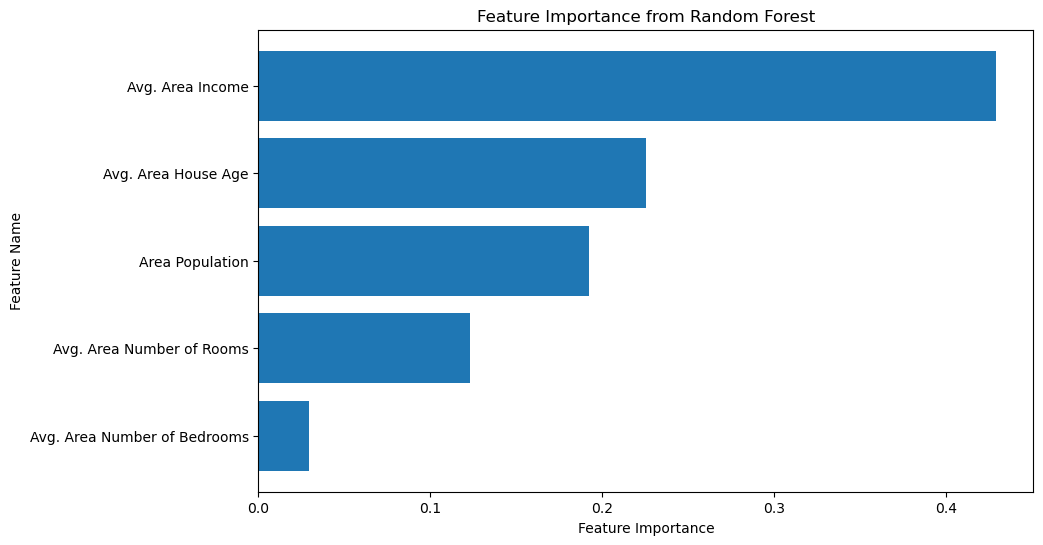

In [19]:
importances = best_rf.feature_importances_

# Pair feature names with their importance scores
feature_names = X.columns  # Use your feature column names
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the feature importances
print(feature_importance_df)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [20]:
# Output results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("\nFeature Importances:")
print(feature_importances)

Mean Squared Error (MSE): 13265930170.838333
Mean Absolute Error (MAE): 91930.59515411755

Feature Importances:
                              Importance
Avg. Area Income                0.429348
Avg. Area House Age             0.225750
Area Population                 0.192331
Avg. Area Number of Rooms       0.123072
Avg. Area Number of Bedrooms    0.029499


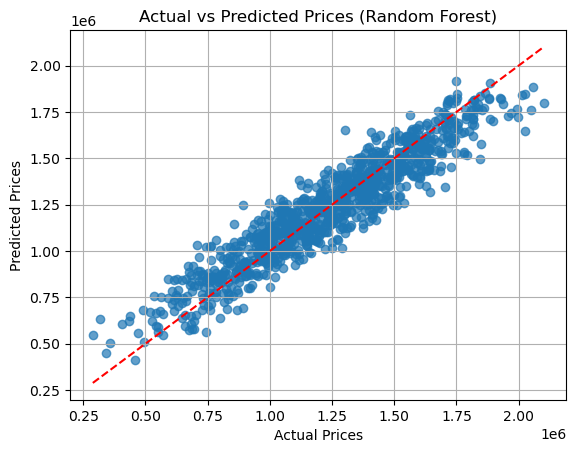

In [21]:
# Visualize actual vs predicted prices
#plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line where predicted = actual
plt.title('Actual vs Predicted Prices (Random Forest)')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

According to the plot
- At the lower price part, the predicted price is higher than the actual price
- At the higher price part, the house price is not sale at predicted price

In [22]:
baseline_mae = np.mean(np.abs(y_test - np.mean(y_test)))
print(f"Baseline MAE: {baseline_mae: .2f}")

Baseline MAE:  271254.02


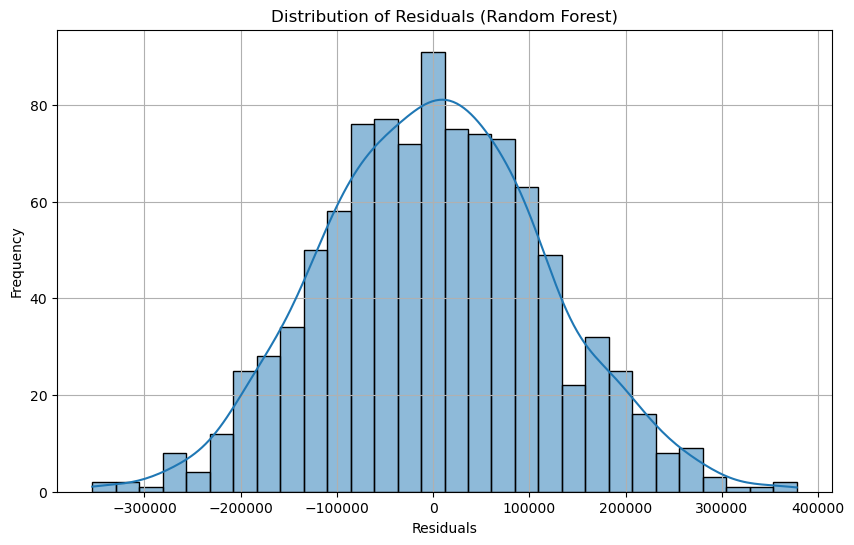

In [23]:
# Visualize residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.title('Distribution of Residuals (Random Forest)')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### 3. Feature Importances
The importance values indicate the relative contribution of each feature to the Random Forest model's predictions.

| **Feature**                  | **Importance** | **Interpretation**                                                                                              |
|------------------------------|----------------|----------------------------------------------------------------------------------------------------------------|
| `Avg. Area Income`           | **0.4294**     | **Most influential feature**: Higher income in an area is strongly predictive of higher house prices.          |
| `Avg. Area House Age`        | **0.2257**     | Older houses in the area have a moderate positive influence on house prices, likely reflecting historical value.|
| `Area Population`            | **0.1923**     | Areas with larger populations tend to have higher housing demand, increasing prices.                           |
| `Avg. Area Number of Rooms`  | **0.1231**     | Houses with more rooms slightly contribute to higher prices, though less significant than other features.       |
| `Avg. Area Number of Bedrooms`| **0.0295**    | **Least influential feature**: Number of bedrooms contributes minimally, possibly because it overlaps with the number of rooms. |

---

### Key Observations

#### Dominant Feature:
- `Avg. Area Income` has the highest importance, aligning with the understanding that income levels significantly influence housing prices.

#### Underperforming Feature:
- `Avg. Area Number of Bedrooms` contributes very little, possibly due to redundancy with `Avg. Area Number of Rooms`.

#### Performance:
- The errors (**MSE** and **MAE**) suggest the model performs reasonably well but struggles with precise predictions due to potential dataset noise or complex relationships.


In [24]:
### end of code added 12/1/2024

### KNN Method model

In [25]:
# import library
from sklearn.neighbors import KNeighborsRegressor

# Setup feature =X and target =y
X= USHousing.drop('Price', axis =1)
y = USHousing["Price"]

#Standarize the X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(USHousing.drop('Price', axis =1))

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
         X_scaled, y, test_size=0.2, random_state=42)

# Define KNN Regressor
knn = KNeighborsRegressor(n_neighbors=1)

#fit KNN model
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

r2_score = knn.score(X_test, y_test)
print(f"R² score: {r2_score: .2f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse: .2f}")

R² score:  0.72
Mean Squared Error:  30251090580.89


### Interpretation of the Results

#### 1. $R^2$ Score
- **Value**: 0.7238
- **Interpretation**:
  - The $R^2$ score, also known as the coefficient of determination, measures the proportion of variance in the target variable (**Price**) explained by the K-Nearest Neighbors (KNN) model.
  - A value of **0.7238** indicates that the KNN model explains approximately **72.38%** of the variability in house prices using the provided features.
  - While this is a reasonably strong performance, it suggests that about **27.62%** of the variability in house prices is due to factors not captured by the model.

---

#### 2. Mean Squared Error (MSE)
- **Value**: 30251090580.89
- **Interpretation**:
  - The MSE measures the average squared differences between actual and predicted house prices.
  - This relatively large value reflects the scale of the target variable (**Price**), which is in the range of hundreds of thousands to millions.
  - Compared to Linear Regression or Random Forest, this higher MSE suggests that KNN (with \( k=1 \)) might be overfitting to the training data.

### KNN method to find the best K

Best K value from the plot: 15


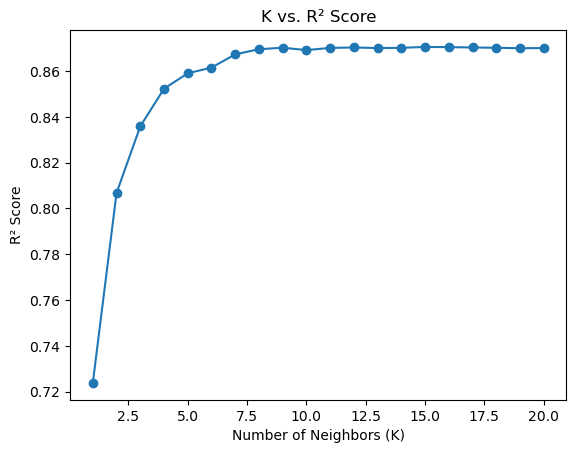

In [26]:
# Find the best k
Kvalues = range(1, 21)
r2_scores =[]
for k in Kvalues:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    r2_scores.append(knn.score(X_test, y_test))
  
# Find the best K
best_k = Kvalues[np.argmax(r2_scores)]
print(f"Best K value from the plot: {best_k}")

# Plot K values vs. R² score
plt.plot(Kvalues, r2_scores, marker='o')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('R² Score')
plt.title('K vs. R² Score')
plt.show()



In [27]:
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
r2_score = knn.score(X_test, y_test)
print(f"R² score: {r2_score: .4f}")
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse: .4f}")

R² score:  0.8705
Mean Squared Error:  14179588603.6388


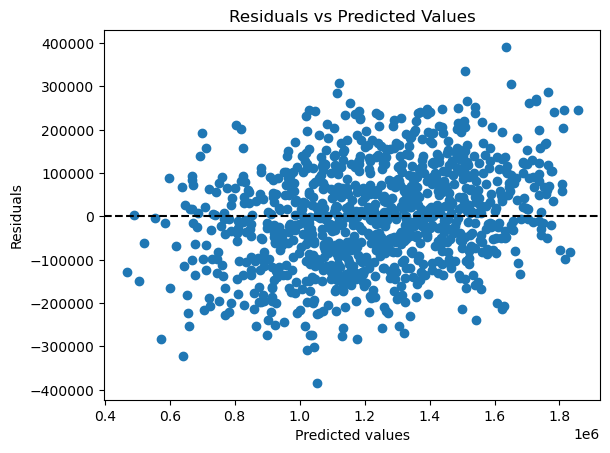

In [28]:
residuals = y_test - y_pred

# Plotting residuals
#plt.scatter(y_pred, residuals)
plt.scatter(y_pred, residuals)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


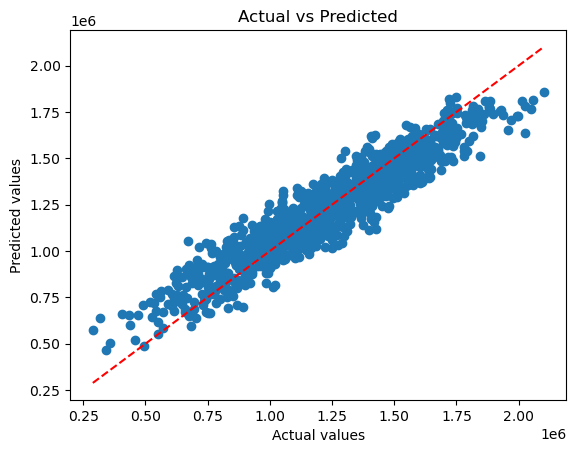

In [29]:
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line where predicted = actual
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted')
plt.show()

#print(knn.score(X_test, y_test))

#### 0.1.10. Interpretation of the Results
 ### 0.1.10.1. 1. $R^2$ Score
Value: 0.870
Interpretationhe 
 score, also known as the coefficient of determination, measures the proportion of variance in the target variable (Price) explained by the K-Nearest Neighbors (KNN) model.
A value of 0.8705 indicates that the KNN model explains approximately 87.05% of the variability in house prices using the provided features.
While this is a reasonably strong performance, it suggests that about 12.95% of the variability in house prices is due to factors not captured by the model.

---

#### 0.1.10.2. 2. Mean Squared Error (MSE)
Value: 14179588603.6388
Interpretation:
The MSE measures the average squared differences between actual and predicted house prices.
This relatively large value reflects the scale of the target variable (Price), which is in the range of hundreds of thousands to millions.
Compared to Linear Regression or Random Forest, this higher MSE suggests that KNN (with ( k=1 )) might be overfitting to the training data.

### Adding the Artificial  Neural Network (ANN) code:

#### load tensorboard

In [30]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

#### **Import TensorFlow, datetime, and os:**

In [31]:
import tensorflow as tf
import datetime, os

In [32]:
print(tf.__version__)

2.18.0


#### Remove "logs" path

In [33]:
import os
import shutil

# shutil module is part of the Python standard library and provides a 
# collection of utility functions for working with files and directories. 

folder_path = "logs/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")


The folder 'logs/' has been deleted.


#### Delete the ".tensorboard-info" directory 

In [34]:
# Delete the ".tensorboard-info" directory 

folder_path = "C:/Users/taich/AppData/Local/Temp/.tensorboard-info/"

# Check if the folder exists before attempting to delete it
if os.path.exists(folder_path):
    # Remove the folder and its contents recursively
    shutil.rmtree(folder_path)
    print(f"The folder '{folder_path}' has been deleted.")
else:
    print(f"The folder '{folder_path}' does not exist.")

The folder 'C:/Users/taich/AppData/Local/Temp/.tensorboard-info/' has been deleted.


### Import library, setup data, and split data with train & test

In [35]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# Setup X as features and y as the target
X = USHousing.drop('Price', axis=1)
y = USHousing["Price"]

# Standardize the X data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


#### Create ANN model

In [36]:
# Build the ANN model
def create_model():
    return tf.keras.models.Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),# First hidden layer
    Dropout(0.2),  # Dropout of 20%
    Dense(64, activation='relu'),                              # Second hidden layer
    Dropout(0.2),
    Dense(32, activation='relu'),                              # Third hidden layer
    Dense(1, activation='linear')                              # Output layer
])


#### Train the model using Keras and the TensorBoard callback


In [ ]:

def train_model():
    model =  create_model()
    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    
    # setup tensorborad logs path
    logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

    # Set up EarlyStopping
    early_stopping_callback = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Stop if val_loss doesn't improve for 10 consecutive epochs
    restore_best_weights=True  # Restore the best model weights
)

    # Train the model
    history = model.fit(X_train, y_train, epochs=100,
                        batch_size=32, verbose=1, 
                        validation_data=(X_test, y_test), 
                        validation_split=0.2,
                        callbacks=[tensorboard_callback, early_stopping_callback])

    return model, history
model, history = train_model()


Epoch 1/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1632360726528.0000 - mae: 1229547.3750 - val_loss: 1631309529088.0000 - val_mae: 1233616.7500
Epoch 2/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1646624899072.0000 - mae: 1236368.5000 - val_loss: 1606880985088.0000 - val_mae: 1224273.7500
Epoch 3/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1579160829952.0000 - mae: 1208268.1250 - val_loss: 1479122616320.0000 - val_mae: 1175096.7500
Epoch 4/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1407462277120.0000 - mae: 1141686.7500 - val_loss: 1150059806720.0000 - val_mae: 1038516.0625
Epoch 5/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1012440236032.0000 - mae: 970622.6875 - val_loss: 653044088832.0000 - val_mae: 783598.3750
Epoch 6/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 528604233728.0000 - mae: 695909.9375 - val_loss: 246508371968.0000 - val_mae: 462738.4375
Epoch 7/100
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 196329963520.000

In [ ]:
model.evaluate(X_test,  y_test, verbose=2) #Displays only the final evaluation results

In [ ]:
# Make predictions on X_test set
from sklearn.metrics import mean_squared_error, r2_score # r2_score might b ovrwrite, so need re-import


y_pred = model.predict(X_test).flatten()  # Ensure y_pred is 1D
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the results
print(f"R² score: {r2:}")
print(f"Mean Squared Error: {mse:}")

# Visualize training and validation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

- The training Loss curve and Validation curve is very close means the model is not overfitting and performance well in dataset

In [ ]:
model.summary()

### Start TensorBoard within the notebook

In [ ]:
# Need to remove # before log on tensorboar 
#%tensorboard --logdir logs

### Conclusions


* In the Random forest of important features of, we will see the "Avg. Area Income" is 42.93% of the reason for the high house price.\
The" Avg. Area Number of Bedrooms" is only about 3%
* At the KNN method, when K= 1, the $R^2$ Score, valu is about 72%, when the best k= 15, the $R^2$ Score is 87%.
* compare the KNN model and K=15 MSE = 10325975387.90, and Random Forest GridsearchCV, the MSE= 13265930170.83. Since the value of the MSE is the smaller the better. SO the bst K of  KNN is better than Random Frest method
* Deep Learning -ANN model uses Dense, Dropout, activation = 'relu'. I also use larning rate = 0.001the  $R^2$ Score is 90.57%, it means the variables provid in dataset is 91% match, the other 9% could be noise of data. MSE=10328803043.68
* This USA Housing Dataset is reasonable.


###  References
   - Academic (if any)
   - Online (if any)
	

* https://www.ibm.com/topics/random-forest# What is Random forest
* https://www.mygreatlearning.com/blog/gridsearchcv/     Great Learning :Hyperparameter Tuning with GridSearchCV
* CISB60 class note
* ChatGPT

### Credits

- If you use and/or adapt your code from existing projects, you must provide links and acknowldge the authors. 
> *This code is based on Mtsac. CISB60 class Example

In [ ]:
# End of Project 12/08/2024